In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [5]:
customers = pd.read_csv('./dataset/cleaned_dataset/customers_with_clustering_features.csv')

In [6]:
clustering_features = ["age", "Price_Sensitivity", "purchase_frequency", "avg_purchase_value"]

In [7]:
scaler = StandardScaler()
customers_scaled = scaler.fit_transform(customers[clustering_features])

In [8]:
customers_scaled_df = pd.DataFrame(customers_scaled, columns=clustering_features)
customers_scaled_df["customer_id"] = customers["customer_id"]

In [10]:
inertia = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(customers_scaled)
    inertia.append(kmeans.inertia_)

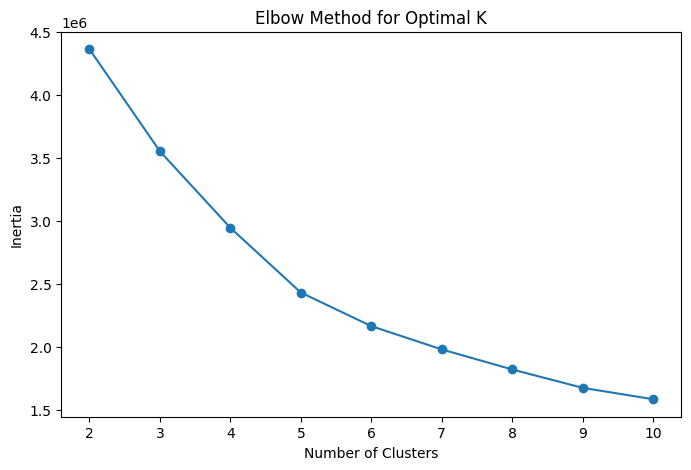

In [11]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

In [12]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
customers_scaled_df["KMeans_Cluster"] = kmeans.fit_predict(customers_scaled)

In [15]:
customers = customers.merge(customers_scaled_df[["customer_id", "KMeans_Cluster"]], on="customer_id")

In [ ]:
customers.to_csv("./dataset/clustered/customers_kmeans_clusters.csv", index=False)

In [17]:
customers["KMeans_Cluster"].value_counts()

KMeans_Cluster
0    527154
2    393468
3    306739
4     77879
1     66740
Name: count, dtype: int64

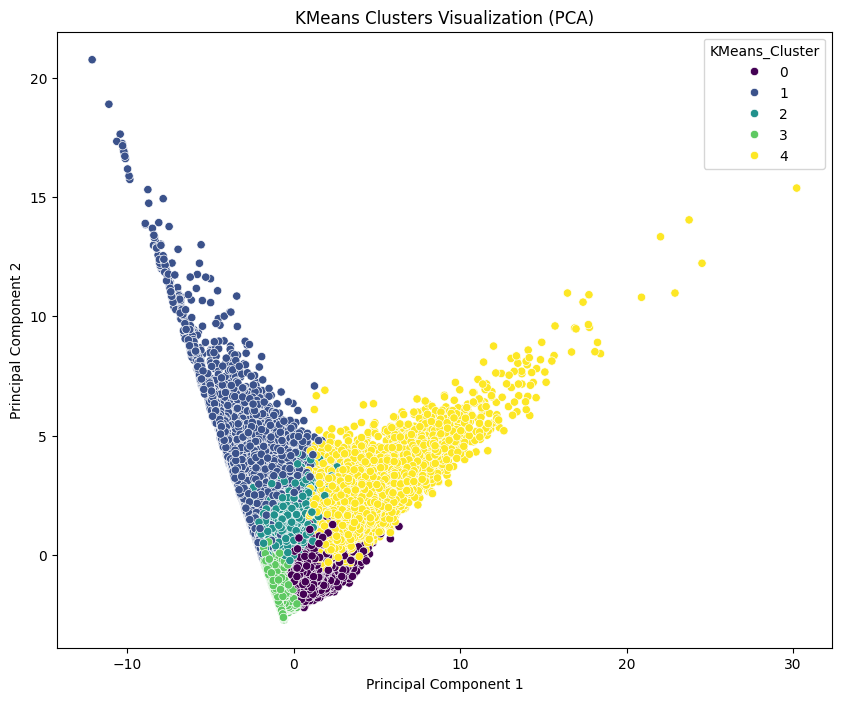

In [21]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(customers_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['principal component 1', 'principal component 2'])
principal_df['KMeans_Cluster'] = customers['KMeans_Cluster']

plt.figure(figsize=(10, 8))
sns.scatterplot(x='principal component 1', y='principal component 2', hue='KMeans_Cluster', data=principal_df, palette='viridis')
plt.title('KMeans Clusters Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()